## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset.  
Mouse_study_df= pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
Mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice using length
Number_mice= len(Mouse_study_df["Mouse ID"])

Number_mice

1893

In [3]:
#Get all the data for the first duplicate mouse ID. 
Duplicated = Mouse_study_df.loc[Mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep = "last")]

#print first duplicated Mouse ID info
Duplicated


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [4]:
#Get all the data for the second duplicate mouse ID. 
Duplicated2 = Mouse_study_df.loc[Mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'], keep = "first")]

#print second duplicated Mouse ID info
Duplicated2

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_study_df = Mouse_study_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep=False)
Clean_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

Number_mice2= len(Clean_study_df["Mouse ID"])

Number_mice2

1883

In [7]:
# Create a groupby drug regimen summary df: 
grouped_drugs_df = Clean_study_df.groupby(["Drug Regimen"]).first()



#Create summary table of mean, median, variance, standard deviation, and SEM of tutor volume

# Calculate average Tumor volume by drug regimen 
grouped_drugs_df["Tumor Volume Average (mm3)"] = Clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

# Calculate median Tumor volume by drug regimen 
grouped_drugs_df["Tumor Volume Median (mm3)"] = Clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

# Calculate variance Tumor volume by drug regimen 
grouped_drugs_df["Tumor Volume Variance (mm3)"] = Clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

# Calculate Standard Deviation Tumor volume by drug regimen 
grouped_drugs_df["Tumor Volume Standard Deviation (mm3)"] = Clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

# Calculate Standard error of the mean Tumor volume by drug regimen 
grouped_drugs_df["Tumor Volume SEM (mm3)"] = Clean_study_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()



# Assemble the resulting series into a single summary dataframe.
columns_to_keep = ["Tumor Volume Average (mm3)","Tumor Volume Median (mm3)","Tumor Volume Variance (mm3)","Tumor Volume Standard Deviation (mm3)","Tumor Volume SEM (mm3)"]

Grouped_drugs_summary = grouped_drugs_df[columns_to_keep]

Grouped_drugs_summary

,Tumor Volume Average (mm3),Tumor Volume Median (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation (mm3),Tumor Volume SEM (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregrated_drugs_df = Clean_study_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

aggregrated_drugs_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

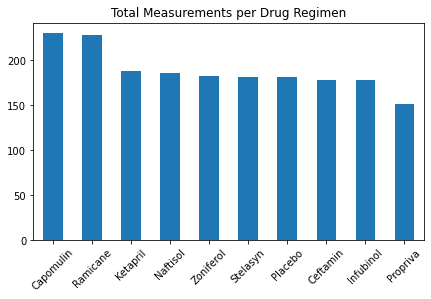

In [9]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Creating new df based on value counts of Drug Regimen to determine how many times that drug was measured
Total_measurements=pd.DataFrame(Clean_study_df["Drug Regimen"].value_counts())


Total_measurements_pandas= Total_measurements.plot( kind="bar", figsize=(7,4), title= 'Total Measurements per Drug Regimen', legend = False, rot= 45)
Total_measurements_pandas

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     151
Name: Drug Regimen, dtype: int64

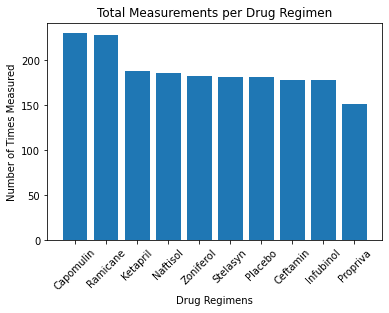

In [10]:
#Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

len_of_list = len(Total_measurements["Drug Regimen"])

#Set X and Y axis to the index and amounts of Total_measurements df
for x in range(0, len_of_list):

   x_axis = Total_measurements.index
   y_axis = Total_measurements["Drug Regimen"]

plt.ylabel('Number of Times Measured')
plt.xlabel("Drug Regimens")
plt.xticks(rotation=45)
plt.title('Total Measurements per Drug Regimen')

plt.bar(x_axis, y_axis)
Total_measurements["Drug Regimen"]

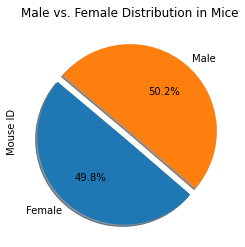

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
gender_distribution = Clean_study_df.groupby("Sex").nunique()["Mouse ID"]

gender_distribution.plot(kind="pie", title="Male vs. Female Distribution in Mice", shadow=True, explode=explode, startangle=140, autopct="%1.1f%%")

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values= sex
labels= sex.index

colors=["blue", "darkorange"]

plt.pie(gender_distribution.values, labels=gender_distribution.index.values, colors=colors, explode= explode, autopct="%1.1f%%", startangle=140, shadow=True)

plt.axis("equal")
plt.title("Male vs. Female Distribution in Mice") 
plt.show()


NameError: name 'sex' is not defined

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  "Capomulin", "Ramicane", "Infubinol", "Ceftamin"

# Start by getting the last (greatest) timepoint for each mouse
relevant_drugs= Clean_study_df[Clean_study_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])].groupby("Mouse ID")["Timepoint"].max()

# # Merge this group df with the original dataframe to get the tumor volume at the last timepoint
relevant_drugs_df= pd.DataFrame(relevant_drugs)

# Combine the data into a single dataset.  
Last_Tumor= pd.merge(relevant_drugs_df, Clean_study_df, on=["Mouse ID", "Timepoint"])

Last_Tumor.head(20)


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
7,a644,45,Ramicane,Female,7,17,32.978522,1
8,a685,45,Infubinol,Male,8,30,66.083066,3
9,b128,45,Capomulin,Female,9,22,38.982878,2


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Drugs=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

#Loop through Tumor Volumes in Last measurements of Tumors and append to empty tumor volume list
for drug in Drugs:
    Last_tumor_volumes= Last_Tumor.loc[Last_Tumor["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume.append(Last_tumor_volumes)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
lowerq = np.percentile(tumor_volume, 25, interpolation ="midpoint")
upperq = np.percentile(tumor_volume, 75, interpolation ="midpoint")
iqr = upperq - lowerq
median = np.median(tumor_volume) 

print(f"The lower quartile of Tumor Volumes are: {lowerq}")   
print(f"The upper quartile of Tumor Volumes are: {upperq}")   
print(f"The interquartile range of Tumor Volumes is: {iqr}")   
print(f"The median of Tumor Volumes is: {median}")

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr) 
upper_bound = upperq + (1.5*iqr) 

print("-------------------------------------------------")
print(f"Values below {lower_bound:.2f} could be outliers")
print(f"Values above {upper_bound:.2f} could be outliers")



The lower quartile of Tumor Volumes are: 37.149837274999996
The upper quartile of Tumor Volumes are: 60.00856799
The interquartile range of Tumor Volumes is: 22.858730715000007
The median of Tumor Volumes is: 45.0
-------------------------------------------------
Values below 2.86 could be outliers
Values above 94.30 could be outliers


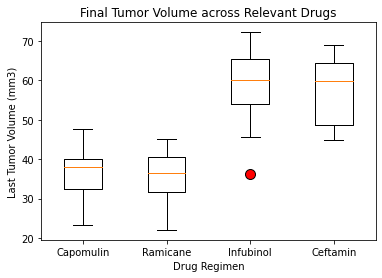

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

flierprops= dict(markerfacecolor= "red", marker ="o", markersize= 10)

plt.boxplot(tumor_volume, labels= Drugs, flierprops=flierprops)
plt.title("Final Tumor Volume across Relevant Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Last Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

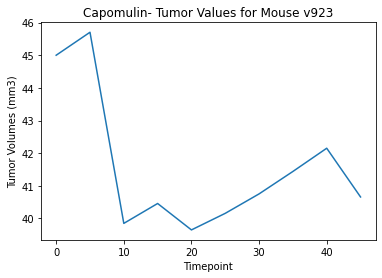

In [78]:
# Generate a line plot of tumor volume vs. time point for one mouse treated with Capomulin
Capomulin_mice_mask= Clean_study_df["Drug Regimen"] == "Capomulin"
Capomulin_mice_only= Clean_study_df.loc[Capomulin_mice_mask, :]

#Getting random mouse ID for a Capomulin mouse
One_Capomulin_mouse = Capomulin_mice_only.sample(1)
MID = One_Capomulin_mouse.iloc[0, 0]

#Use Boolean Mask to only look up 1 random mouse ID for a Capomulin mouse
One_mouse_mask = Clean_study_df["Mouse ID"] == MID
One_mouse= Clean_study_df.loc[One_mouse_mask, :]
One_mouse

#Plot line chart according to Mouse ID (VARIES due to sample Mouse ID)
plt.plot(One_mouse["Timepoint"], One_mouse["Tumor Volume (mm3)"])
plt.title(f"Capomulin- Tumor Values for Mouse {MID}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volumes (mm3)")
plt.show()

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mice
x_limit = #maximum x value 

x_axis = np.arange(0, x_limit, 1)

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", s=x_axis, alpha=0.75)
# plt.title("Capomulin- Tumor Values for Mouse b128")
# plt.xlabel("Timepoint")
# plt.ylabel("Tumor Volumes (mm3)")
# plt.ylim(0, 1)
# plt.xlim(0, x_limit)

plt.show()

SyntaxError: invalid syntax (<ipython-input-65-c6a77dd63d85>, line 3)

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
